This source code is taken from https://www.askpython.com/python/examples/principal-component-analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced


In [ ]:
#Get the IRIS dataset
url = "/content/drive/MyDrive/Colab Notebooks/Iris.csv"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
data

,sepal length,sepal width,petal length,petal width,target
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#prepare the data
x = data.iloc[1:,0:4]
x

,sepal length,sepal width,petal length,petal width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [ ]:
#prepare the target
target = data.iloc[1:,4]
target

1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: target, Length: 150, dtype: object

In [ ]:
#Applying it to PCA function
mat_reduced = PCA(x.astype(float) , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
target.reset_index(drop=True, inplace=True)

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
principal_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


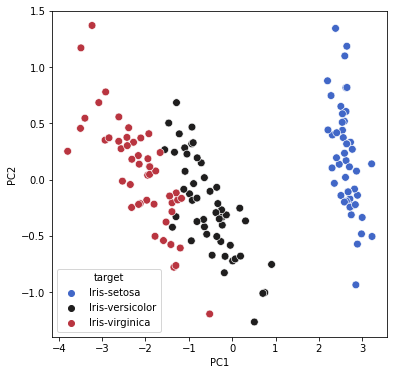

In [ ]:
#HASIL PCA-EVD
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

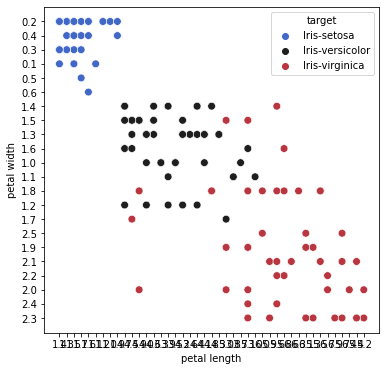

In [ ]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = dataset , x = 'petal length',y = 'petal width' , hue = 'target' , s = 60 , palette= 'icefire')

In [ ]:
X = principal_df.drop(columns=["target"])
y = principal_df["target"]

In [ ]:
#SPLIT DATA
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#print(X_train)
#print(y_train)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1).fit(X)


In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
pred = kmeans.predict(X)

In [ ]:
hasil = kmeans.transform(X)

In [ ]:
hasil

In [ ]:
len(hasil)

150

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
new_data = pd.DataFrame(hasil)
new_data

,0,1,2
0,5.030951,0.142830,3.412464
1,5.081095,0.367713,3.383644
2,5.252274,0.411687,3.559486
3,5.126203,0.512638,3.410925
4,5.075418,0.168123,3.457429
...,...,...,...
145,0.411300,4.584859,1.380346
146,1.045365,4.204711,0.862391
147,0.613814,4.406310,1.173147
148,0.471542,4.543083,1.315188


In [ ]:
X["target"] = pred

In [ ]:
X

,PC1,PC2,target
0,2.684207,0.326607,1
1,2.715391,-0.169557,1
2,2.889820,-0.137346,1
3,2.746437,-0.311124,1
4,2.728593,0.333925,1
...,...,...,...
145,-1.944017,0.187415,0
146,-1.525664,-0.375021,2
147,-1.764046,0.078519,0
148,-1.901629,0.115877,0


In [ ]:
###############################################################

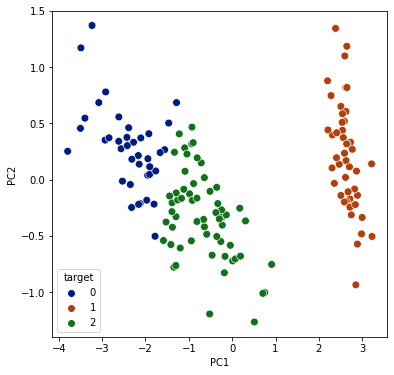

In [ ]:
#HASIL CLUSTERING PCA-EVD + K-MEANS
plt.figure(figsize = (6,6))
sb.scatterplot(data = X , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'dark')

# PERTANYAAN
Apakah hasil clustering-nya tepat?
---
Hasil clustering tergolong cukup tepat karena hampir semua data memiliki kelompok yang benar. Ada beberapa data yang memiliki kelompok yang salah.








---


PCA-evd

---
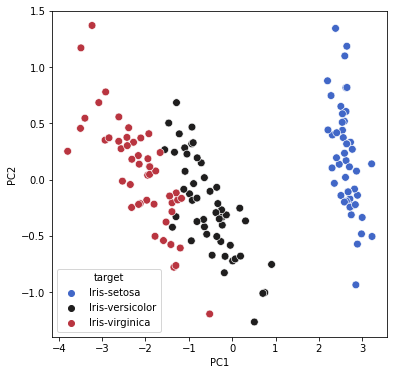


---
PCA-evd +K-means


---
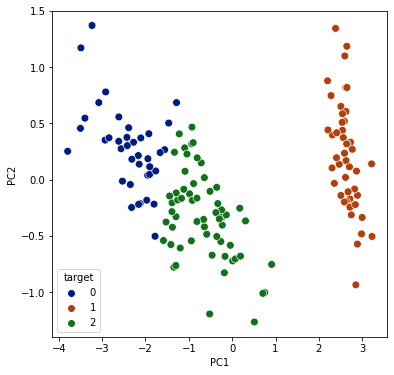


---
Perbedaan


---
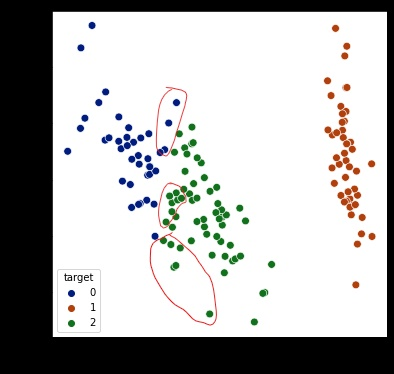





